In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


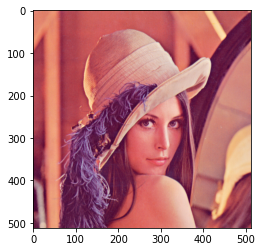

In [2]:
import cv2
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/imageLab1/lena.png'
img = cv2.imread(path, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
print("Max intensity: ", img.max())
print("Min intensity: ", img.min())

Max intensity:  255
Min intensity:  3


In [4]:
print(img.shape)

(512, 512, 3)


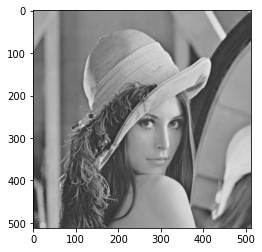

In [5]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

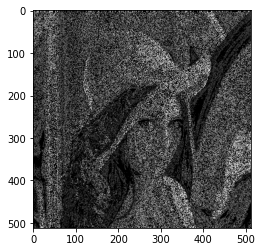

In [7]:
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i,j]%2==0:
      img[i][j]=0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


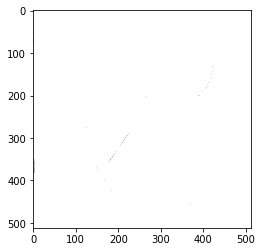

In [37]:
import numpy as np

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_H = img.shape[0]
img_W = img.shape[1]

kernel = np.array(([0,-1,0], [-1, 5, -1], [0,-1,0]), np.float32)
# kernel = np.transpose(kernel)
kernel_size  = len(kernel)
print(kernel_size)
extra = (kernel_size-1)//2
img = cv2.copyMakeBorder(img,extra,extra,extra,extra, cv2.BORDER_REPLICATE)

result = np.zeros((img_H, img_W), dtype='float32')
n = (kernel_size - 1)//2
for x in range(img_H):
  for y in range(img_W):
    sum = 0
    for j in range(kernel_size):
      for i in range(n,kernel_size):
        sum += kernel[i,j]*img[x-i-1, y-j-1]
    result[x,y] = sum
    # print(sum)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()
